In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("Sacramentorealestatetransactions.csv")
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [6]:
df = df[['sq__ft','price']]
df.head()

,sq__ft,price
0,836,59222
1,1167,68212
2,796,68880
3,852,69307
4,797,81900


In [7]:
df = df[df['sq__ft']>0]
df.head()

,sq__ft,price
0,836,59222
1,1167,68212
2,796,68880
3,852,69307
4,797,81900


In [8]:
df.describe()

,sq__ft,price
count,814.000000,814.000000
mean,1591.146192,229448.369779
std,663.841930,119825.576060
min,484.000000,2000.000000
25%,1144.000000,148750.000000
50%,1418.500000,207986.500000
75%,1851.000000,284973.250000
max,5822.000000,884790.000000


In [9]:
X = df['sq__ft']
Y = df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [15]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
y_predict = regressor.predict(X_test.values.reshape(-1,1))

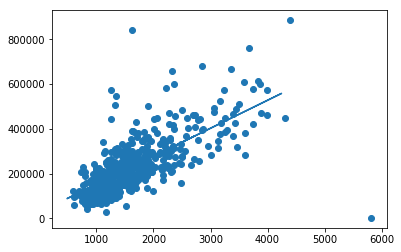

In [47]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_predict)
plt.show()

In [49]:
x = np.array(X_train)
y = np.array(y_train)
x1 = np.array(X_test)

In [52]:
def regression():
    
    g0 = 0
    g1 = 1

    
    def hypothesis(xx):
        return g0 + (g1 * xx)


    def summation1():
        sum = 0
        for i in range(0, len(x)):
            sum += hypothesis(x[i]) - y[i]
        return sum


    def summation2():
        sum = 0
        for i in range(0, len(x)):
            sum += ((hypothesis(x[i]) - y[i]) * x[i])
        return sum


    for i in range(0, 900):
        temp0 = g0 - (0.0000001 * (summation1() / len(x)))
        temp1 = g1 - (0.0000001 * (summation2() / len(x)))
        g0 = temp0
        g1 = temp1

    y_new = []

    for k in range(0, len(x1)):
        m = hypothesis(x1[k])
        y_new.append(m)

    plt.scatter(x,y)
    plt.plot(x1,y_new)
    plt.show()

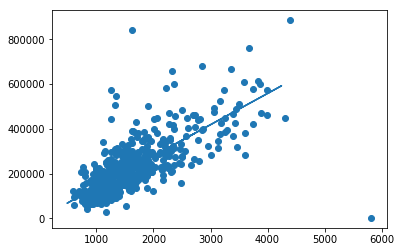

In [53]:
regression()

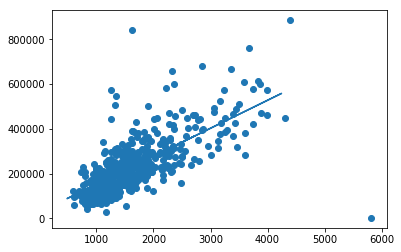

In [48]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_predict)
plt.show()